Web Scraping and Analysis

In [ ]:
pip install requests

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import re

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages+1):
  print(f"Scraping page {i}")

  # Create URL to collect links from paginated data
  url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

  # Collect HTML data
  response = requests.get(url)

  # Parse content
  content = response.content
  parsed_content = BeautifulSoup(content, "html.parser")
  for i in parsed_content.find_all("div", {"class": "text_content"}):
    reviews.append(i.get_text())

  print(f"  ---> {len(reviews)} total reviews")

Scraping page 1
  ---> 100 total reviews
Scraping page 2
  ---> 200 total reviews
Scraping page 3
  ---> 300 total reviews
Scraping page 4
  ---> 400 total reviews
Scraping page 5
  ---> 500 total reviews
Scraping page 6
  ---> 600 total reviews
Scraping page 7
  ---> 700 total reviews
Scraping page 8
  ---> 800 total reviews
Scraping page 9
  ---> 900 total reviews
Scraping page 10
  ---> 1000 total reviews


In [ ]:
df = pd.DataFrame(reviews)
df = df.rename(columns = {0: 'reviews'})
df

,reviews
0,✅ Trip Verified | I like the British Airways ...
1,✅ Trip Verified | I have come to boarding and...
2,✅ Trip Verified | Stinking nappies being chang...
3,✅ Trip Verified | Worst service ever. Lost bag...
4,✅ Trip Verified | BA 246 21JAN 2023 Did not a...
...,...
995,✅ Trip Verified | Prague to London Heathrow. ...
996,✅ Trip Verified | London City to Florence. My...
997,✅ Trip Verified | London to Johannesburg. Sin...
998,✅ Trip Verified | Doha to London Heathrow. Fl...


In [ ]:
!mkdir data
df.to_csv("/content/data/BAreviews.csv")

Preprocessing Data

In [ ]:
def remove_punctuation(text):
  text = re.sub(r"Trip (Verified|Unverified)", "", text)
  text = re.sub('[,\.!?✅|]', '', text)
  text = re.sub(r"\s+", " ", text).strip()
  return text

In [ ]:
reviews_clean = [remove_punctuation(text) for text in df['reviews']]
reviews_clean[:2]

['I like the British Airways World Traveller Plus product The seats are comfy and the food is good The crew on this flight were very attentive and friendly especially the CSM who came round and introduced herself to us and made sure we were comfortable The bars closed half way through the flight to Cancun as they can’t uplift more alcoholic drinks in Cancun Juice water tea and coffee is available Very full flight My only criticisms of British Airways Premium Economy is that it feels like they actively try and split families up unless they pay the £100 each to pre book seats The majority of drinks are served in plastic not glass There were no inflight snacks available on an 11 hour flight It’s an upgraded version of Economy where as other airlines like Qantas and Singapore Airlines are Business minus Still worth the extra though',
 'I have come to boarding and my cabin luggage was taken "because the plane is full" I asked to take it to the cabin because I have large notebook and electro

In [ ]:
df['reviews'] = df['reviews'].apply(remove_punctuation).apply(str.lower)
df['reviews']

0      i like the british airways world traveller plu...
1      i have come to boarding and my cabin luggage w...
2      stinking nappies being changed in business cab...
3      worst service ever lost baggage because of del...
4      ba 246 21jan 2023 did not appreciate the unpro...
                             ...                        
995    prague to london heathrow very disappointing s...
996    london city to florence my flight was at aroun...
997    london to johannesburg since the aircraft was ...
998    doha to london heathrow flight on time not com...
999    miami to tel aviv via london at miami airport ...
Name: reviews, Length: 1000, dtype: object

In [ ]:
pip install wordcloud

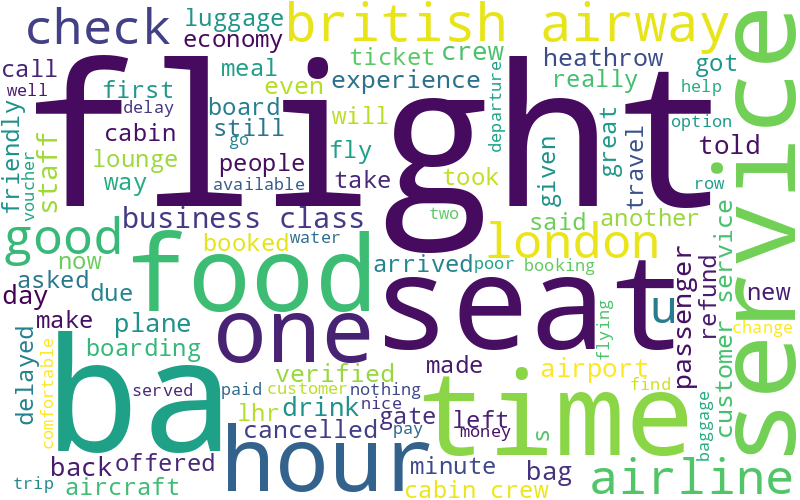

In [ ]:
from wordcloud import WordCloud
strings = ','.join(list(df['reviews'].values))

# Create word cloud object
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color= "steelblue", width = 800, height = 500)

# Generate a word cloud
wordcloud.generate(strings)
wordcloud.to_image()

Topic Modeling using LDA

In [ ]:
# Prepare data
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['ba'])

def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
  cleaned_texts = []
  for doc in texts:
    cleaned_doc = []

    for word in simple_preprocess(str(doc)):
      if word not in stop_words:
        cleaned_doc.append(word)

    cleaned_texts.append(cleaned_doc)
  return cleaned_texts

data = df['reviews'].values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)
data_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[['like',
  'british',
  'airways',
  'world',
  'traveller',
  'plus',
  'product',
  'seats',
  'comfy',
  'food',
  'good',
  'crew',
  'flight',
  'attentive',
  'friendly',
  'especially',
  'csm',
  'came',
  'round',
  'introduced',
  'us',
  'made',
  'sure',
  'comfortable',
  'bars',
  'closed',
  'half',
  'way',
  'flight',
  'cancun',
  'uplift',
  'alcoholic',
  'drinks',
  'cancun',
  'juice',
  'water',
  'tea',
  'coffee',
  'available',
  'full',
  'flight',
  'criticisms',
  'british',
  'airways',
  'premium',
  'economy',
  'feels',
  'like',
  'actively',
  'try',
  'split',
  'families',
  'unless',
  'pay',
  'pre',
  'book',
  'seats',
  'majority',
  'drinks',
  'served',
  'plastic',
  'glass',
  'inflight',
  'snacks',
  'available',
  'hour',
  'flight',
  'upgraded',
  'version',
  'economy',
  'airlines',
  'like',
  'qantas',
  'singapore',
  'airlines',
  'business',
  'minus',
  'still',
  'worth',
  'extra',
  'though'],
 ['come',
  'boarding',
  'cab

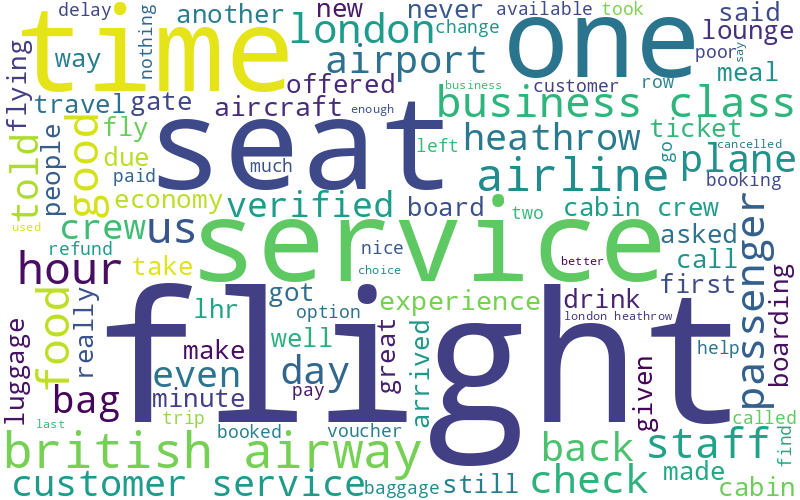

In [ ]:
flat_cleaned_word = []

for xx in data_words:
  for x in xx:
    flat_cleaned_word.append(x)

strings2 = ','.join(flat_cleaned_word)
wordcloud.generate(strings2)
wordcloud.to_image()

In [ ]:
import gensim.corpora as corpora

# Create dictionary
id2word = corpora.Dictionary(data_words)

# Create corpus
texts = data_words

# Term document frequency (TF)
corpus = []
for text in texts:
  corpus.append(id2word.doc2bow(text))

corpus[:1] # So the output is (word_id, word_frequency)

[[(0, 1),
  (1, 2),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 2),
  (9, 1),
  (10, 1),
  (11, 2),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 2),
  (20, 2),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 4),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 3),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 2),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1)]]

In [ ]:
# Training LDA model
from pprint import pprint

num_topics = 20

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

# Print the keyword of the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.019*"flight" + 0.010*"us" + 0.009*"service" + 0.007*"crew" + '
  '0.007*"heathrow" + 0.006*"time" + 0.006*"airways" + 0.005*"london" + '
  '0.005*"food" + 0.005*"minutes"'),
 (1,
  '0.018*"flight" + 0.009*"seat" + 0.008*"service" + 0.007*"seats" + '
  '0.006*"london" + 0.006*"would" + 0.005*"one" + 0.005*"time" + '
  '0.005*"airline" + 0.004*"check"'),
 (2,
  '0.020*"flight" + 0.013*"seat" + 0.008*"british" + 0.007*"get" + '
  '0.007*"london" + 0.006*"airways" + 0.006*"hours" + 0.006*"service" + '
  '0.005*"one" + 0.005*"seats"'),
 (3,
  '0.008*"flight" + 0.008*"service" + 0.007*"crew" + 0.007*"london" + '
  '0.004*"get" + 0.004*"really" + 0.004*"better" + 0.004*"staff" + '
  '0.004*"heathrow" + 0.004*"seats"'),
 (4,
  '0.037*"flight" + 0.010*"service" + 0.009*"food" + 0.008*"british" + '
  '0.008*"airways" + 0.007*"crew" + 0.007*"business" + 0.007*"class" + '
  '0.007*"london" + 0.006*"time"'),
 (5,
  '0.012*"flight" + 0.010*"service" + 0.007*"one" + 0.006*"airways" + '
  '0

In [ ]:
# Evaluate LDA model using coherence score, high score indicating better model
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.2733398853914104


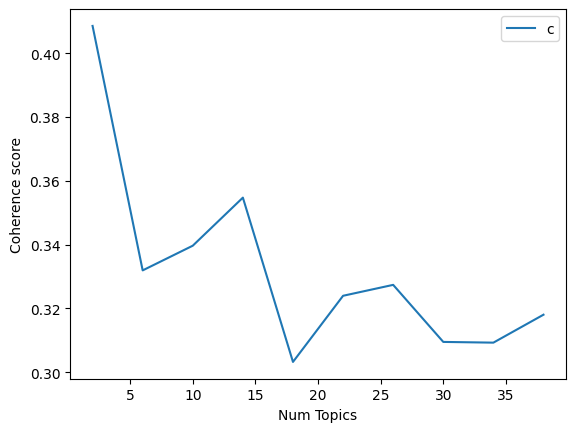

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=40, step=4)

# Show graph
limit=40; start=2; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
best_result_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[best_result_index]

# Select the model and print the topics
model_topics = optimal_model.show_topics(formatted=False)
print(f'''The {x[best_result_index]} topics gives the highest coherence score
of {coherence_values[best_result_index]}''')

The 2 topics gives the highest coherence score 
of 0.4085467640867714


In [ ]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 22.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicor

In [ ]:
pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 24.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.0
    Uninstalling pandas-2.2.0:
      Successfully uninstalled pandas-2.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
# Visualization
import pyLDAvis.gensim as gensimvis
import pyLDAvis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Evaluate LDA model using coherence score, high score indicating better model
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=optimal_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score:  0.4085467640867714


In [ ]:
# Print the keyword of the topics
pprint(optimal_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.028*"flight" + 0.008*"london" + 0.008*"service" + 0.007*"british" + '
  '0.007*"airways" + 0.007*"us" + 0.006*"get" + 0.006*"hours" + '
  '0.006*"customer" + 0.006*"time"'),
 (1,
  '0.019*"flight" + 0.011*"service" + 0.010*"good" + 0.010*"food" + '
  '0.009*"crew" + 0.008*"class" + 0.008*"cabin" + 0.007*"time" + 0.007*"seat" '
  '+ 0.007*"business"')]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
"""# Try LDA Mallet model instead to see what model that works better

!wget -P /content/data http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip /content/data/mallet-2.0.8.zip -d /content/data"""

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'# Try LDA Mallet model instead to see what model that works better\n\n!wget -P /content/data http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip\n!unzip /content/data/mallet-2.0.8.zip -d /content/data'

In [ ]:
"""lda_mallet_path = "/content/data/mallet-2.0.8"
lda_mallet_model = gensim.models.wrappers.LdaMallet(lda_mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

# Show topics
pprint(lda_mallet_model.show_topics(formatted=False))

# Compute coherence score
coherence_model_ldamallet = CoherenceModel(model=lda_mallet_model, texts=texts, dictionary=id2word, coherence="c_v")
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print("Coherence Score of LDA Mallet: ", coherence_ldamallet)"""

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'lda_mallet_path = "/content/data/mallet-2.0.8"\nlda_mallet_model = gensim.models.wrappers.LdaMallet(lda_mallet_path, corpus=corpus, num_topics=10, id2word=id2word)\n\n# Show topics\npprint(lda_mallet_model.show_topics(formatted=False))\n\n# Compute coherence score\ncoherence_model_ldamallet = CoherenceModel(model=lda_mallet_model, texts=texts, dictionary=id2word, coherence="c_v")\ncoherence_ldamallet = coherence_model_ldamallet.get_coherence()\nprint("Coherence Score of LDA Mallet: ", coherence_ldamallet)'

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('/content/data'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(optimal_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# Load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, '/content/data'+ str(num_topics) +'.html')

LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.059818  0.0       1        1  50.666294
1     -0.059818  0.0       2        1  49.333706, topic_info=            Term        Freq       Total Category  logprob  loglift
30          good  397.000000  397.000000  Default  30.0000  30.0000
26          food  416.000000  416.000000  Default  29.0000  29.0000
182       lounge  175.000000  175.000000  Default  28.0000  28.0000
1083      refund  126.000000  126.000000  Default  27.0000  27.0000
698    cancelled  176.000000  176.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
260        would  147.989569  344.144107   Topic2  -5.5044  -0.1374
329        check  137.395659  322.242616   Topic2  -5.5787  -0.1459
337   experience  116.857990  206.048680   Topic2  -5.7406   0.1394
2        airways  123.445714  391.395753   Topic2  -5.6858  -0.4474
8        british  123.491039  394.974063   Topic2  -5.6854  -0.4561

[191 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
97        1  0.335014  aircraft
97        2  0.664151  aircraft
568       1  0.634213   airline
568       2  0.368375   airline
287       1  0.800682   airport
...     ...       ...       ...
258       2  0.948957      wine
1289      1  0.063192     wines
1289      2  0.947887     wines
260       1  0.569529     would
260       2  0.430052     would

[285 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])